 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [39]:
# Reading whale returns
w_returns_v1 = pd.read_csv("Resources/whale_returns.csv",index_col="Date")

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [52]:
Count nulls
w_returns_v1.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [55]:
#Shows the number of rows after droped null values
w_returns_v1.dropna().count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [ ]:
# Drop nulls


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [60]:
# Reading algorithmic returns
algo_returns_v1 = pd.read_csv("Resources/algo_returns.csv")
algo_returns_v1


,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [61]:
# Count nulls
algo_returns_v1.isnull().sum()


Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [151]:
# Drop nulls
algo_returns_v2 = algo_returns_v1.dropna()


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [133]:
# Reading S&P 500 Closing Prices
sp500_returns_v1 = pd.read_csv("Resources/sp500_history.csv")
sp500_returns_v1.head(2)

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97


In [134]:
# Check Data Types
sp500_returns_v1.dtypes

Date     object
Close    object
dtype: object

In [165]:
# Fix Data Types
sp500_returns_v1['Date'] = pd.to_datetime(sp500_returns_v1['Date'])
sp500_returns_v1['Close'] = sp500_returns_v1['Close'].replace("[$,]", "", regex=True).astype(float)
sp500_returns_v1.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [137]:
# Calculate Daily Returns
sp500_returns_v2 = sp500_returns_v1.set_index("Date")

In [138]:
# Drop nulls
sp500_returns_v2.dropna()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [144]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_v2.rename(columns={"Date":"Date","Close":"SnP 500 Close"},inplace=True)
sp500_returns_v2

,SnP 500 Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


## Combine Whale, Algorithmic, and S&P 500 Returns

In [ ]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.


In [376]:
w_returns_v3 = pd.read_csv("Resources/whale_returns.csv")
sp500_returns_v3 = pd.read_csv("Resources/sp500_history.csv")
algo_returns_v3 = pd.read_csv("Resources/algo_returns.csv")

In [377]:
w_returns_v3["Date"] = pd.to_datetime(w_returns_v3["Date"])

In [378]:
w_returns_v3.dtypes

Date                           datetime64[ns]
SOROS FUND MANAGEMENT LLC             float64
PAULSON & CO.INC.                     float64
TIGER GLOBAL MANAGEMENT LLC           float64
BERKSHIRE HATHAWAY INC                float64
dtype: object

In [379]:
sp500_returns_v3["Date"] = pd.to_datetime(sp500_returns_v3["Date"])
sp500_returns_v3['Close'] = sp500_returns_v3['Close'].replace("[$,]", "", regex=True).astype(float)

In [380]:
sp500_returns_v3.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [381]:
algo_returns_v3 = algo_returns_v3.dropna()
algo_returns_v3.head(3)

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668


In [382]:
algo_returns_v3["Date"] = pd.to_datetime(algo_returns_v3["Date"])
algo_returns_v3["Algo 1"] = algo_returns_v3["Algo 1"].astype(float)
algo_returns_v3["Algo 2"] = algo_returns_v3["Algo 2"].astype(float)
algo_returns_v3 = algo_returns_v3.drop_duplicates().dropna()
w_returns_v3 = w_returns_v3.drop_duplicates().dropna()
sp500_returns_v3 = sp500_returns_v3.drop_duplicates().dropna()

In [383]:
merged_data = pd.merge(w_returns_v3, sp500_returns_v3, how='outer', on='Date')
merged_data2 = pd.merge(merged_data, algo_returns_v3, how='outer', on='Date')
merged_data2.dropna(inplace=True)
merged_data2.rename(columns={'SOROS FUND MANAGEMENT LLC':'SFM','PAULSON & CO.INC.':'PnC','TIGER GLOBAL MANAGEMENT LLC':'TGM','BERKSHIRE HATHAWAY INC':'BH','Close':'SnP Close'}, inplace = True)

In [384]:
merged_data2.columns = ['Date','SFM','Pnc','TGM','BH','SnP Close','Algo 1','Algo 2']

In [385]:
comb_df = merged_data2.set_index('Date')

In [386]:
comb_df['SnP Close'] = comb_df['SnP Close'].pct_change().dropna()


In [387]:
comb_df = comb_df.dropna()

<AxesSubplot:xlabel='Date'>

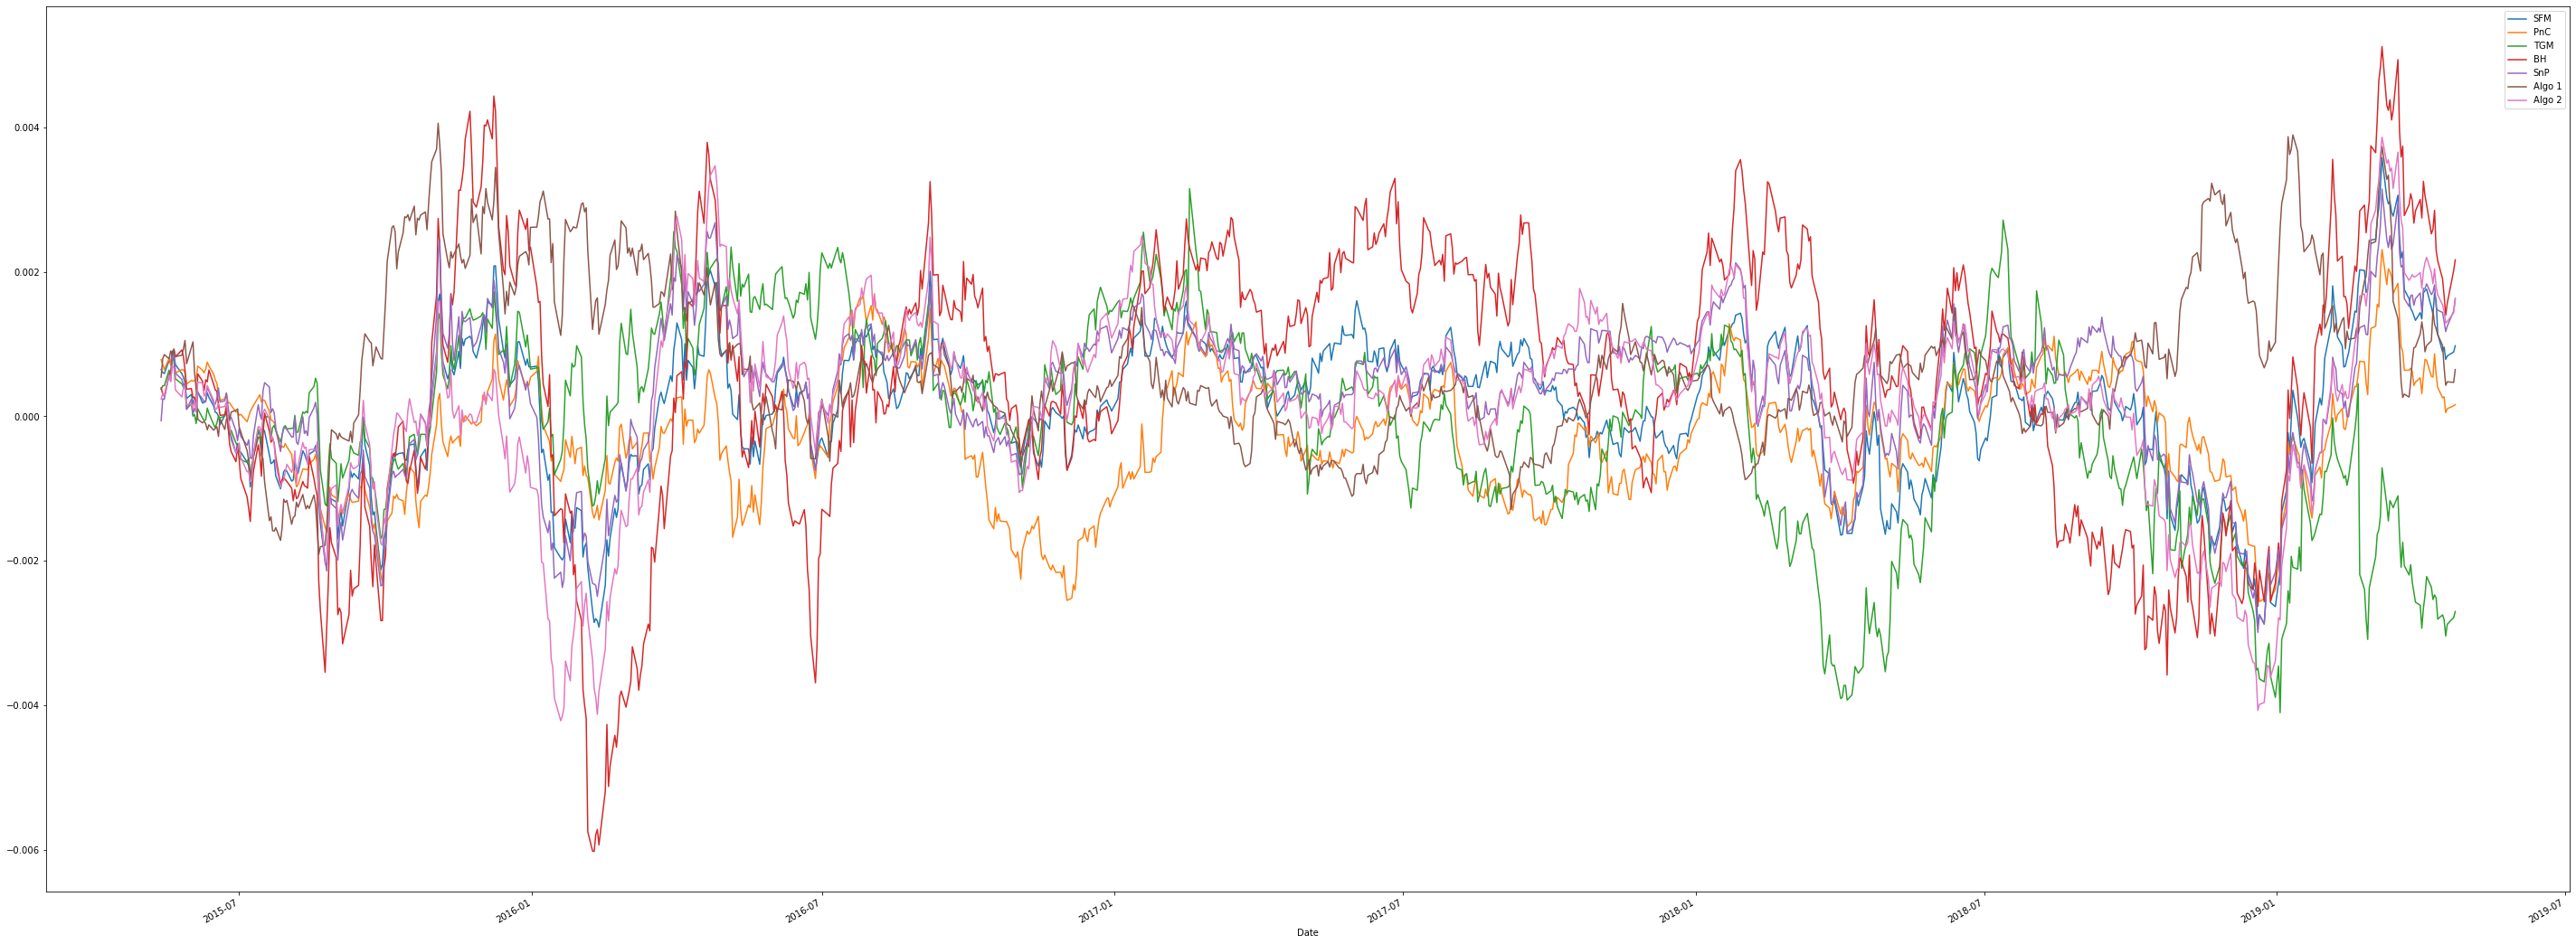

In [398]:
comb_df.rolling(window=50).mean().plot(y=['SFM','PnC','TGM','BH','SnP','Algo 1','Algo 2'], use_index=True, figsize=(50,20))

In [391]:
comb_df.columns = ['SFM','PnC','TGM','BH','SnP','Algo 1','Algo 2']

In [392]:
comb_df

,SFM,PnC,TGM,BH,SnP,Algo 1,Algo 2
Date,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.004389,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001196,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.003944,-0.005447,0.001303
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.016961,-0.001392,-0.012155
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,0.000509,-0.006945,0.002899
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.002274,-0.010301,-0.005228
2019-04-18,0.001448,0.001222,0.000582,0.001916,0.001579,-0.000588,-0.001229


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

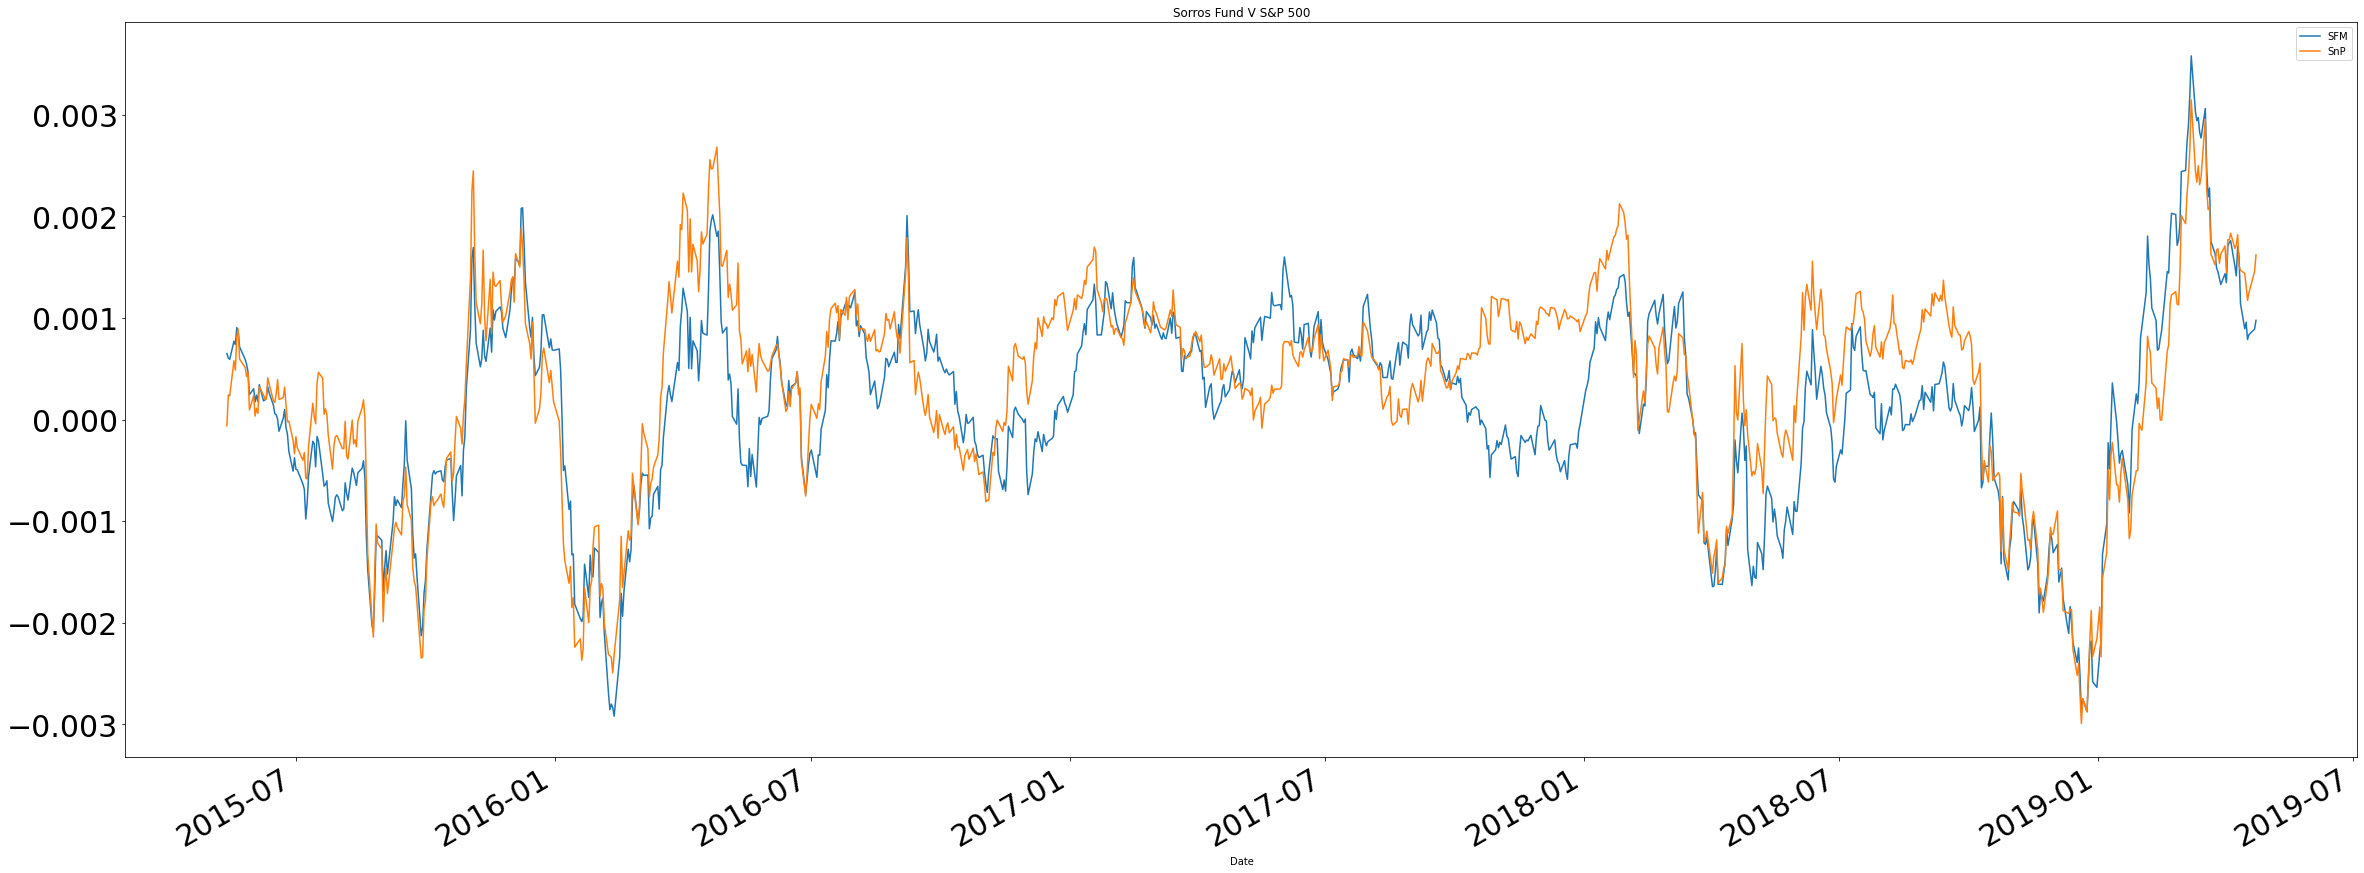

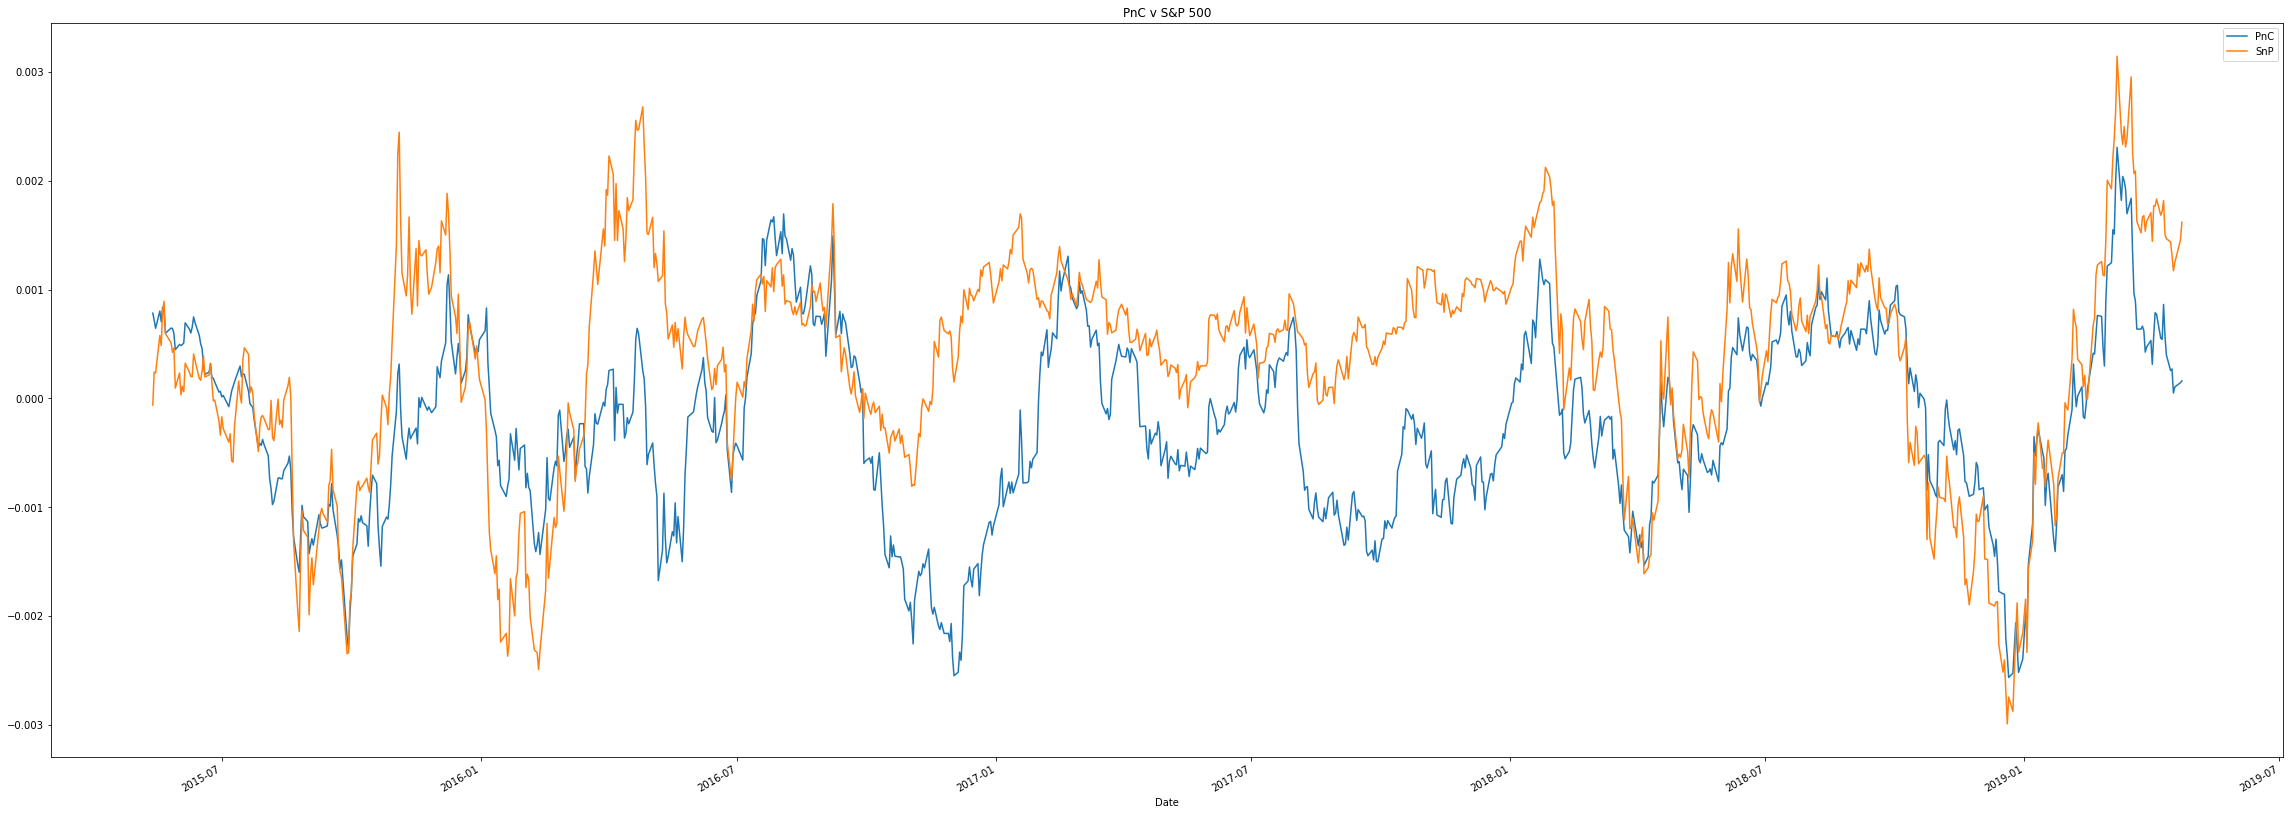

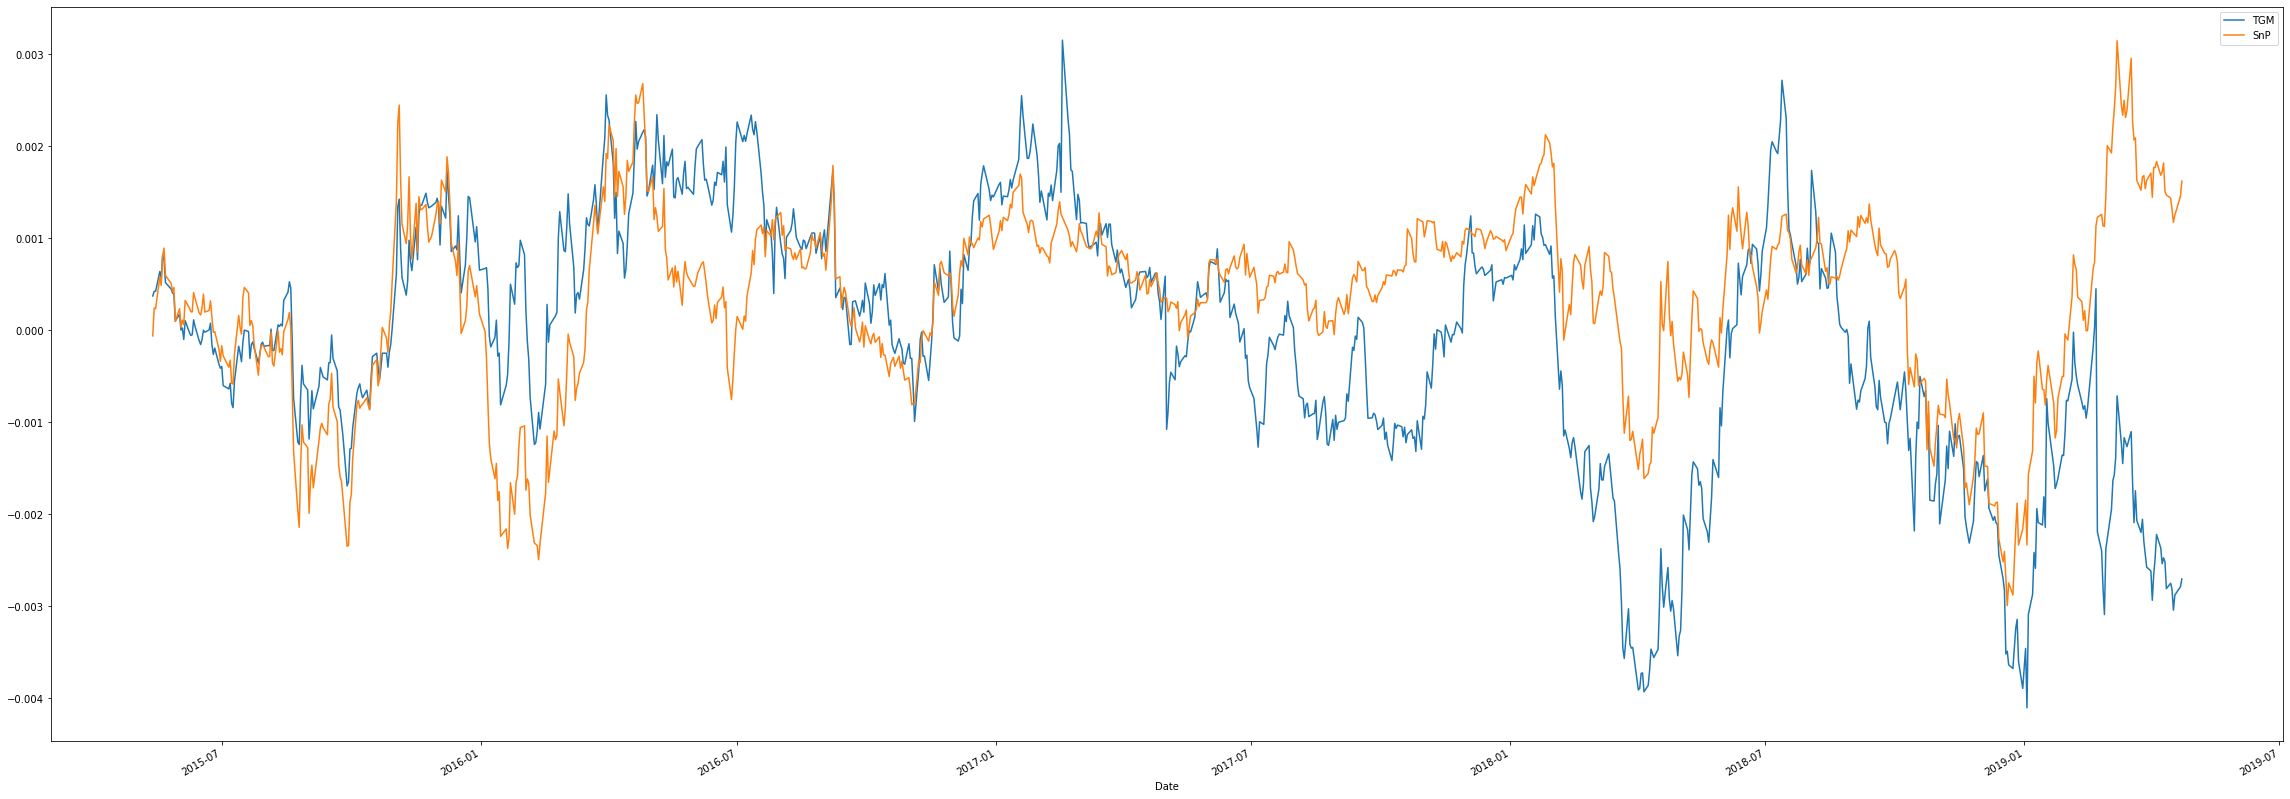

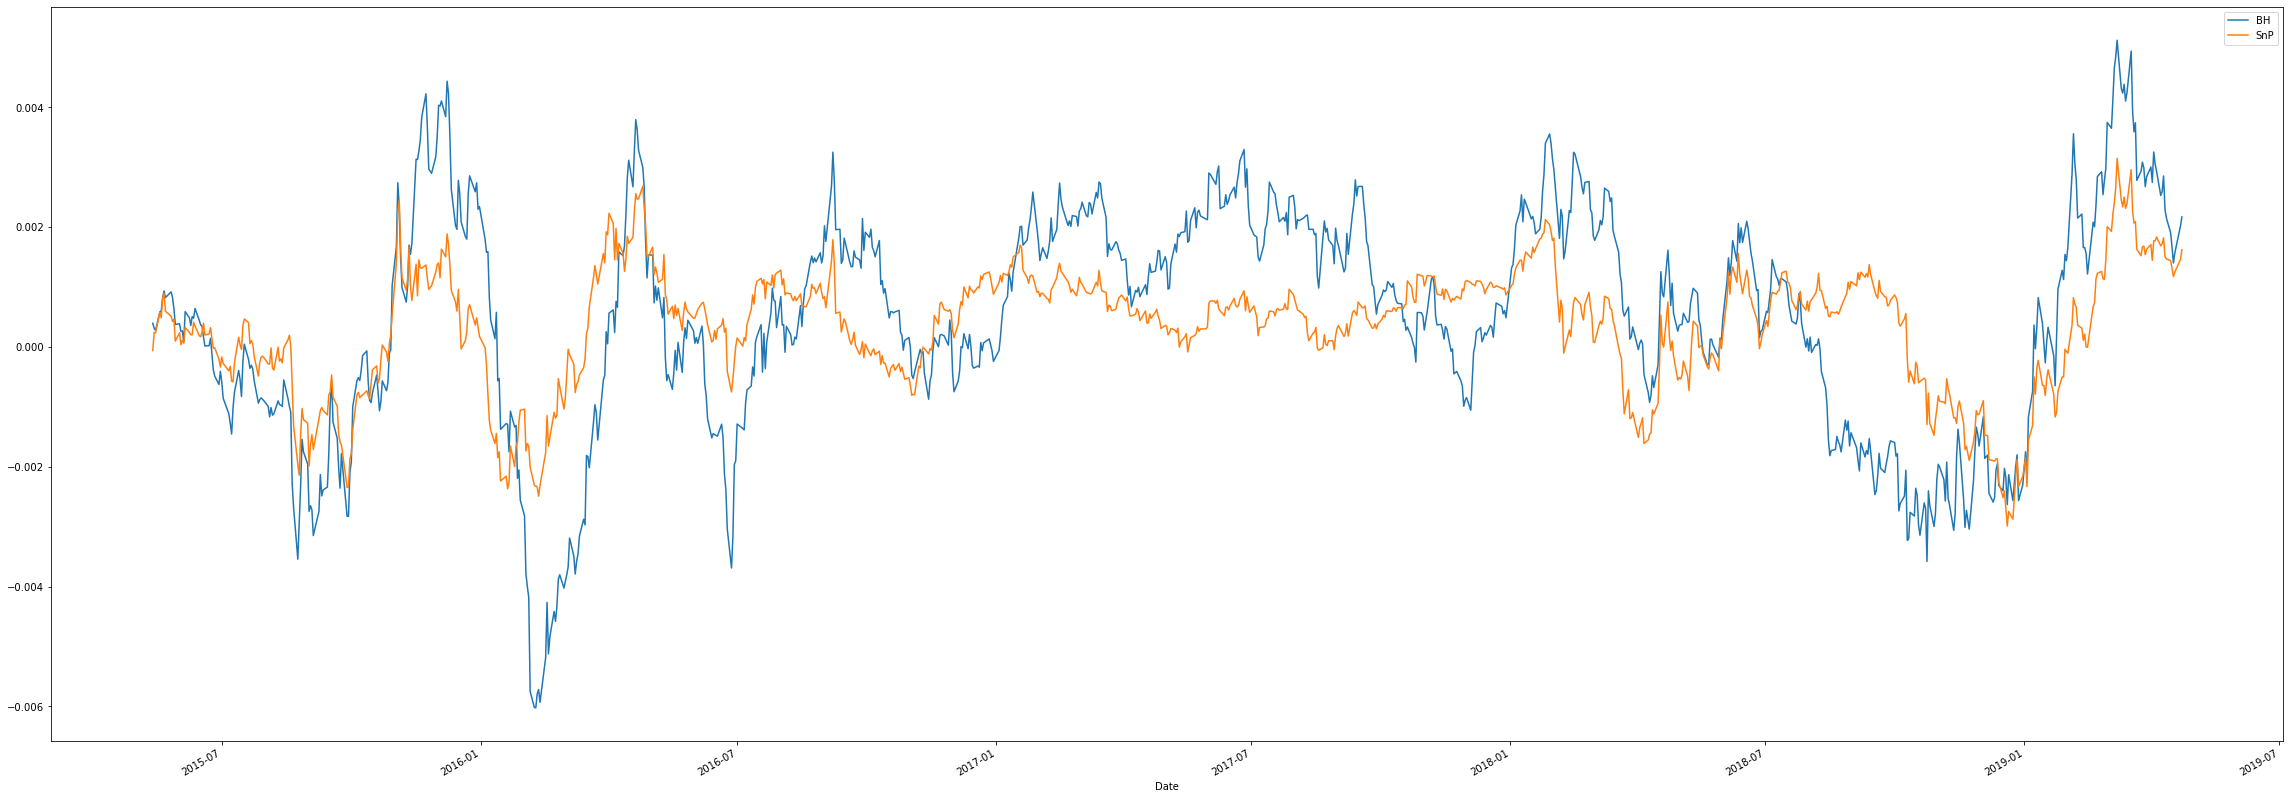

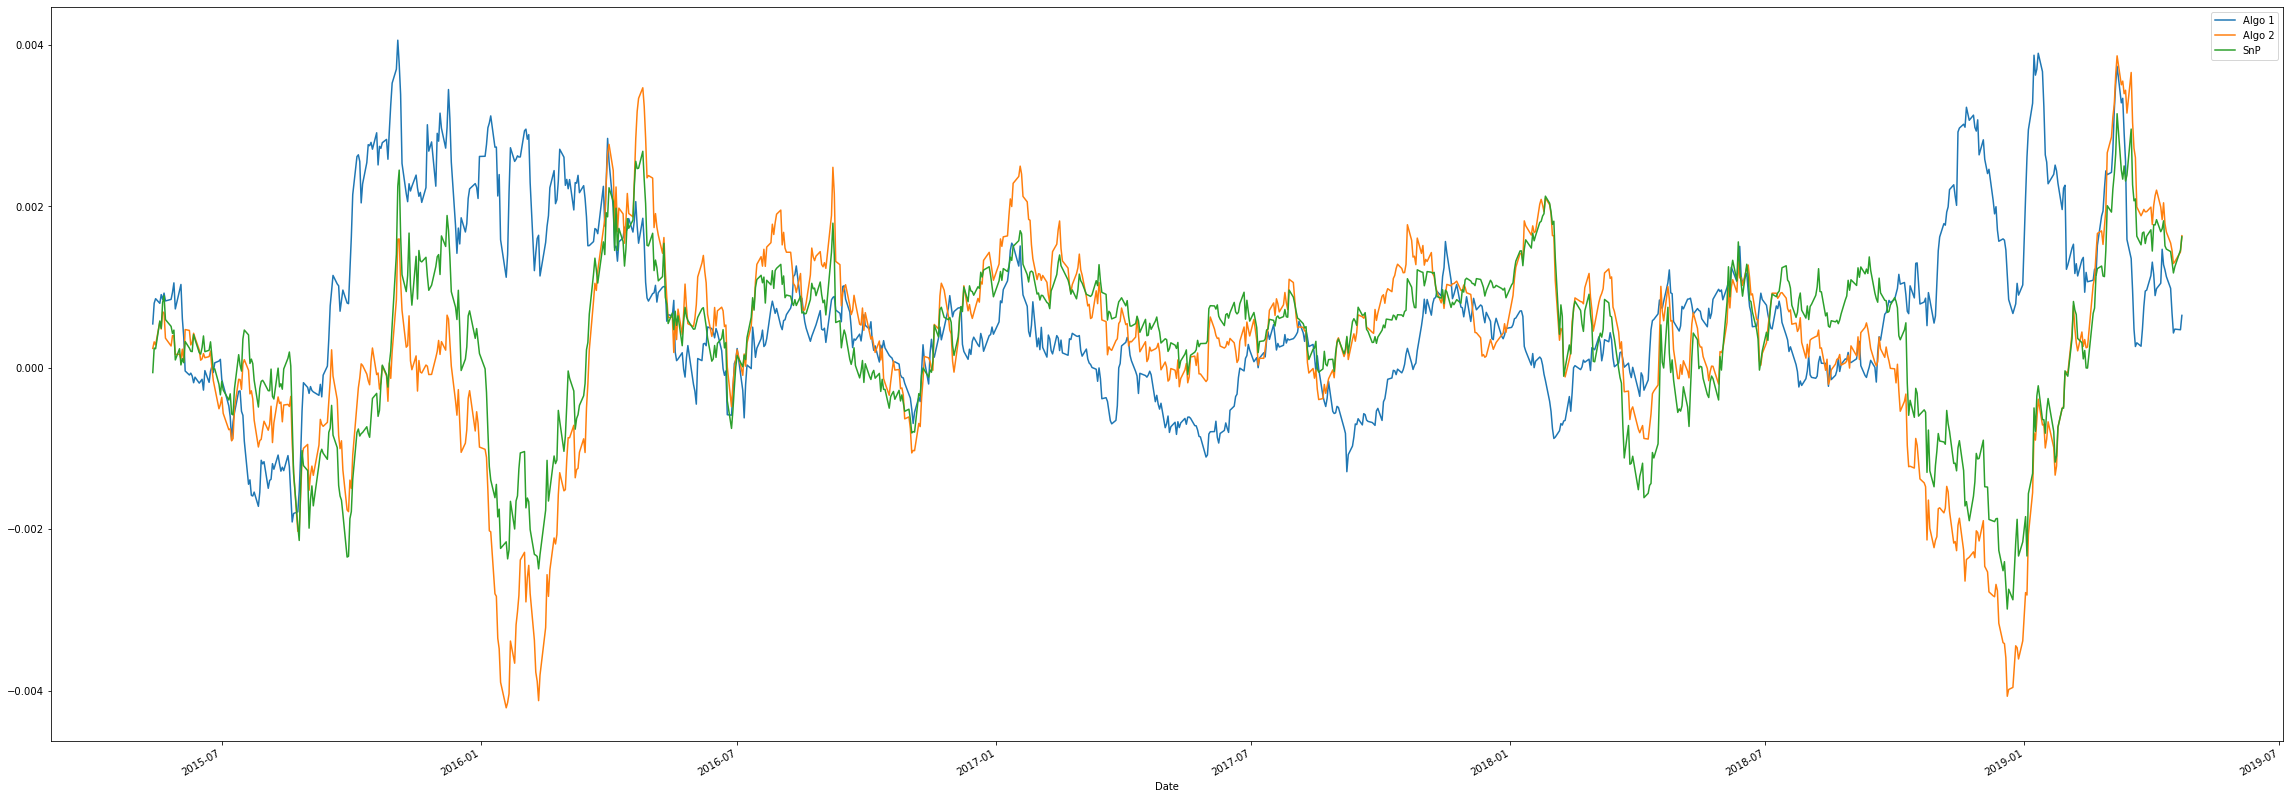

In [394]:
# Plot daily returns of all portfolios

SFM_return_plot = comb_df.rolling(window = 50).mean().plot(fontsize=30,legend=True,title="Sorros Fund V S&P 500",y=['SFM','SnP'],kind='line',figsize=(40,15),use_index=True)
PnC_return_plot = comb_df.rolling(window = 50).mean().plot(title="PnC v S&P 500",y=['PnC','SnP'],kind='line',figsize=(40,15),use_index=True)
TGM_return_plot = comb_df.rolling(window = 50).mean().plot(y=['TGM','SnP'],kind='line',figsize=(40,15),use_index=True)
BH_return_plot = comb_df.rolling(window = 50).mean().plot(y=['BH','SnP'],kind='line',figsize=(40,15),use_index=True)
algos_return_plot = comb_df.rolling(window = 50).mean().plot(y=['Algo 1','Algo 2','SnP'],kind='line',figsize=(40,15),use_index=True)


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

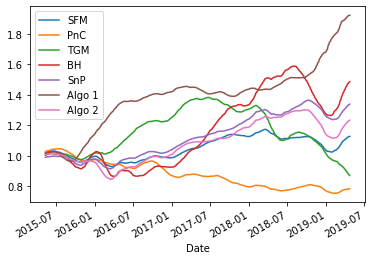

In [408]:
# Calculate cumulative returns of all portfolios
cum_ret = (comb_df + 1).cumprod()

# Plot cumulative returns
cum_ret.rolling(window=50).mean().plot()

In [409]:
cum_ret

,SFM,PnC,TGM,BH,SnP,Algo 1,Algo 2
Date,,,,,,,
2015-03-04,1.002230,1.003241,0.997466,1.004213,0.995611,0.991411,1.002416
2015-03-05,1.006255,1.007331,0.999815,1.010968,0.996802,0.990464,1.006750
2015-03-06,0.998300,1.003730,0.991335,0.997726,0.982674,0.985555,0.995212
2015-03-09,0.998881,1.007971,0.997127,0.996077,0.986550,0.980187,0.996509
2015-03-10,0.988630,1.002588,0.985083,0.986376,0.969817,0.978822,0.984396
...,...,...,...,...,...,...,...
2019-04-16,1.162436,0.790750,0.862507,1.536957,1.379205,1.948774,1.268973
2019-04-17,1.159068,0.785636,0.858704,1.541909,1.376069,1.928700,1.262338
2019-04-18,1.160747,0.786596,0.859203,1.544863,1.378242,1.927566,1.260787


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


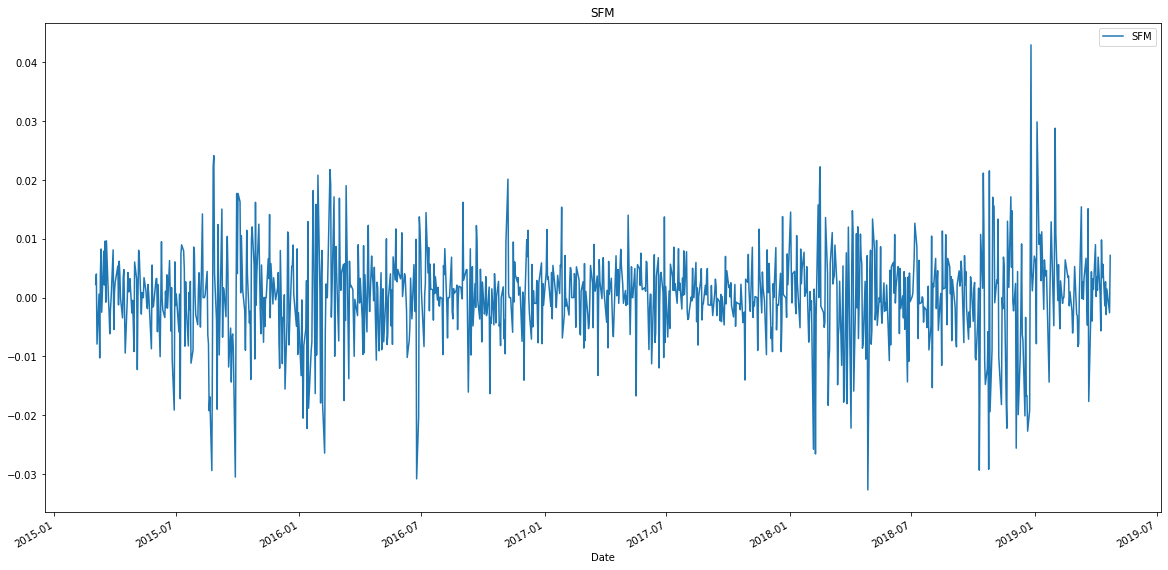

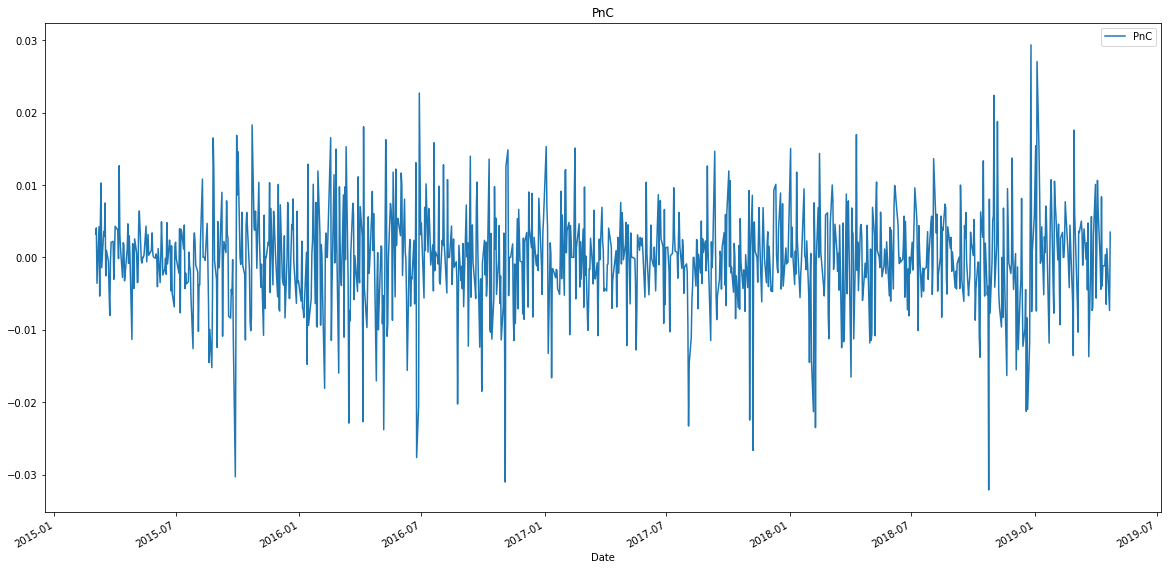

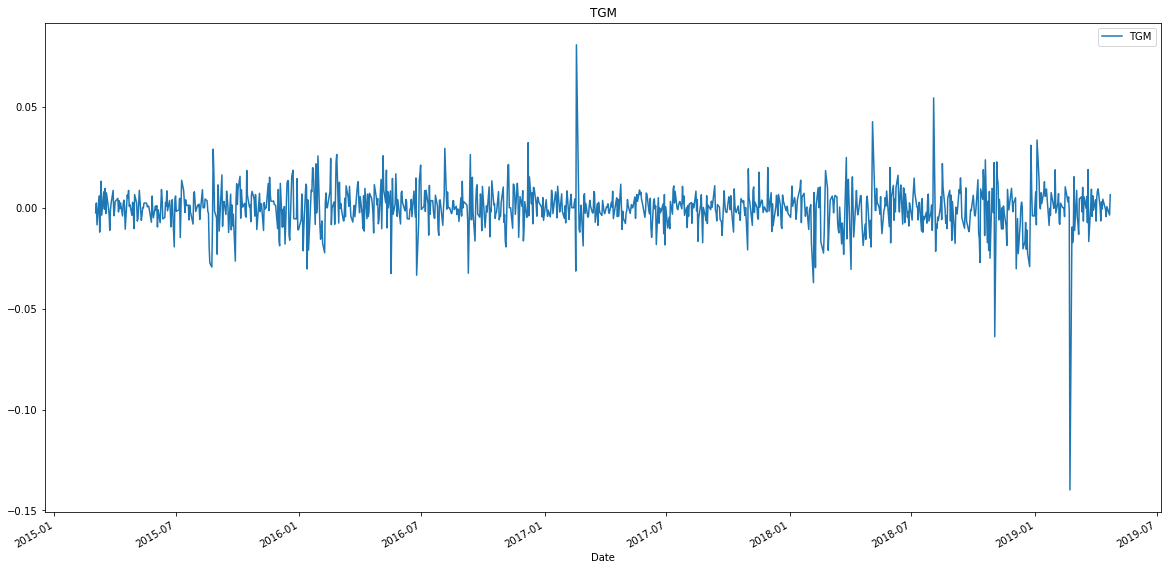

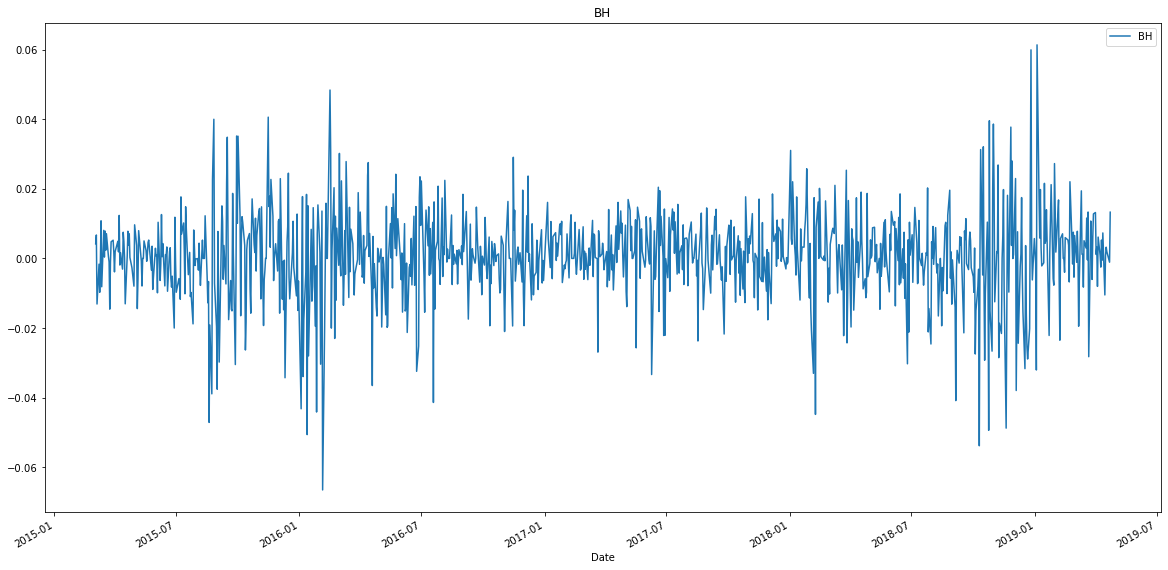

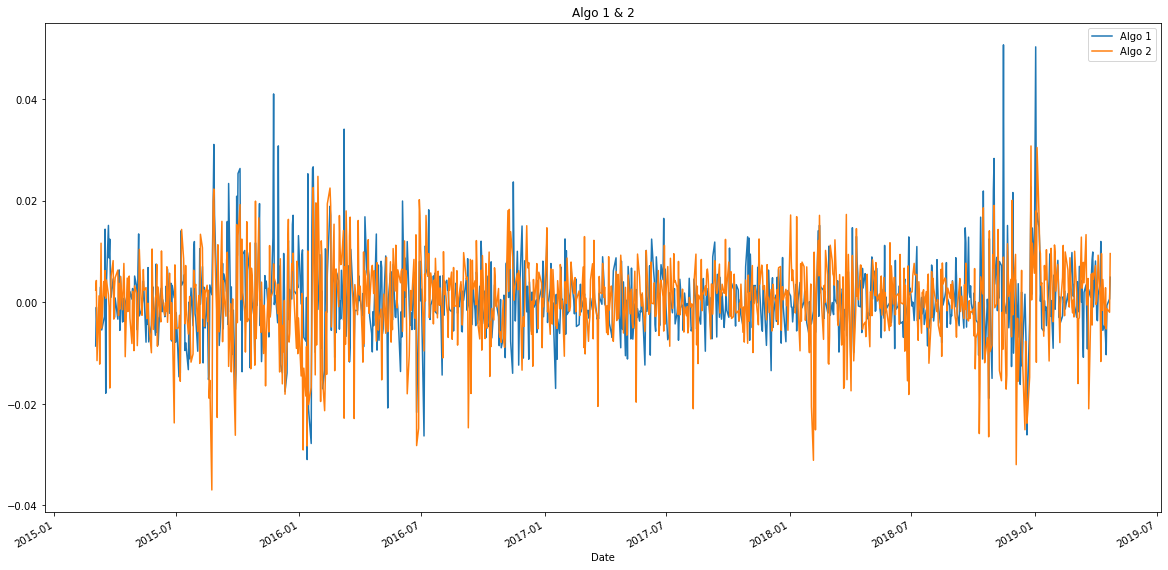

In [456]:
# Box plot to visually show risk
SFM_return_plot = comb_df.plot(fontsize=10,legend=True,title="SFM",y='SFM',kind='line',figsize=(20,10),use_index=True)
PnC_return_plot = comb_df.plot(fontsize=10,legend=True,title="PnC",y='PnC',kind='line',figsize=(20,10),use_index=True)
TGM_return_plot = comb_df.plot(fontsize=10,legend=True,title="TGM",y='TGM',kind='line',figsize=(20,10),use_index=True)
BH_return_plot = comb_df.plot(fontsize=10,legend=True,title="BH",y='BH',kind='line',figsize=(20,10),use_index=True)
algos_return_plot = comb_df.plot(fontsize=10,legend=True,title="Algo 1 & 2",y=['Algo 1','Algo 2'],kind='line',figsize=(20,10),use_index=True)

### Calculate Standard Deviations

In [450]:
# Calculate the daily standard deviations of all portfolios
import statistics as stt
import math as m

In [446]:
std_PnC = stt.stdev(cum_ret["PnC"])
std_SFM = stt.stdev(cum_ret["SFM"])
std_TGM = stt.stdev(cum_ret["TGM"])
std_BH = stt.stdev(cum_ret["BH"])
std_algo_1 = stt.stdev(cum_ret["Algo 1"])
std_algo_2 = stt.stdev(cum_ret["Algo 2"])

In [447]:
stds = {
    "std_PnC":std_PnC,
    "std_SFM":std_SFM,
    "std_TGM":std_TGM,
    "std_BH":std_BH,
    "std_algo_1":std_algo_1,
    "std_algo_2":std_algo_2
}

stds

{'std_PnC': 0.08886315918627717,
 'std_SFM': 0.0733490396984297,
 'std_TGM': 0.14991996912048958,
 'std_BH': 0.24323340667075186,
 'std_algo_1': 0.23252389629317086,
 'std_algo_2': 0.1318605777998184}

### Determine which portfolios are riskier than the S&P 500

In [444]:
# Calculate  the daily standard deviation of S&P 500

std_SnP = stt.stdev(cum_ret["SnP"])
std_SnP

# Determine which portfolios are riskier than the S&P 500


0.1451211171399016

### Calculate the Annualized Standard Deviation

In [454]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = std_SnP*(m.sqrt(250))
annual_std

2.2945663337509465

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [491]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
SFM_return_rolling21 = comb_df["SFM"].rolling(window=21).mean().dropna()
PnC_return_rolling21 = comb_df["PnC"].rolling(window=21).mean().dropna()
TGM_return_rolling21 = comb_df["TGM"].rolling(window=21).mean().dropna()
BH_return_rolling21 = comb_df["BH"].rolling(window=21).mean().dropna()
algo1_return_rolling21 = comb_df["Algo 1"].rolling(window = 21).mean().dropna()
algo2_return_rolling21 = comb_df["Algo 2"].rolling(window = 21).mean().dropna()

combined_rolling21 = pd.merge(SFM_return_rolling21, PnC_return_rolling21,how='outer', on='Date')
combined_rolling21 = pd.merge(combined_rolling21, TGM_return_rolling21, how='outer', on='Date')
combined_rolling21 = pd.merge(combined_rolling21, BH_return_rolling21, how='outer',on='Date')
combined_algo_rolling21 = pd.merge(algo1_return_rolling21, algo2_return_rolling21, how='outer', on='Date')
comb_df_rolling = pd.merge(combined_rolling21,combined_algo_rolling21,how='outer',on='Date')
comb_df_rolling
# Plot the rolling standard deviation
#SFM_return_plot = comb_df.rolling(window=10).mean().plot(fontsize=10,legend=True,title="SFM",y='SFM',kind='line',figsize=(20,10),use_index=True)
#PnC_return_plot = comb_df.rolling(window=10).mean().plot(fontsize=10,legend=True,title="PnC",y='PnC',kind='line',figsize=(20,10),use_index=True)
#TGM_return_plot = comb_df.rolling(window=10).mean().plot(fontsize=10,legend=True,title="TGM",y='TGM',kind='line',figsize=(20,10),use_index=True)
#BH_return_plot = comb_df.rolling(window=10).mean().plot(fontsize=10,legend=True,title="BH",y='BH',kind='line',figsize=(20,10),use_index=True)
#algos_return_plot = comb_df.rolling(window = 50).mean().plot(fontsize=10,legend=True,title="Algo 1 & 2",y=['Algo 1','Algo 2'],kind='line',figsize=(20,10),use_index=True)

,SFM,PnC,TGM,BH,Algo 1,Algo 2
Date,,,,,,
2015-04-01,0.000933,0.000790,0.000396,0.000263,0.000586,0.000165
2015-04-02,0.000948,0.000841,0.000663,0.000156,0.001037,0.000282
2015-04-06,0.001013,0.000826,0.000771,0.000070,0.000926,0.000379
2015-04-07,0.001330,0.000988,0.001077,0.000783,0.001257,0.000801
2015-04-08,0.001597,0.001389,0.000963,0.001450,0.001821,0.000917
...,...,...,...,...,...,...
2019-04-16,0.001450,0.000153,0.001473,0.001979,0.000864,0.000614
2019-04-17,0.001305,-0.000252,0.000996,0.001581,0.000475,0.000389
2019-04-18,0.001597,0.000020,0.001376,0.001691,0.000883,0.000283


### Calculate and plot the correlation

In [492]:
# Calculate the correlation
comb_df.corr()

# Display de correlation matrix


,SFM,PnC,TGM,BH,SnP,Algo 1,Algo 2
SFM,1.000000,0.699961,0.561246,0.754385,0.837908,0.321175,0.826869
PnC,0.699961,1.000000,0.434551,0.545465,0.669612,0.268692,0.678214
TGM,0.561246,0.434551,1.000000,0.424465,0.624023,0.164384,0.507414
BH,0.754385,0.545465,0.424465,1.000000,0.751297,0.291912,0.688112
SnP,0.837908,0.669612,0.624023,0.751297,1.000000,0.279366,0.858828
Algo 1,0.321175,0.268692,0.164384,0.291912,0.279366,1.000000,0.288214
Algo 2,0.826869,0.678214,0.507414,0.688112,0.858828,0.288214,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [495]:
# Calculate covariance of a single portfolio
covariance_SFM = comb_df["SFM"].pct_change().cov(comb_df["SFM"].pct_change())
covariance_SFM

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


nan

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [500]:
# Reading data from 1st stock
goog_df = pd.read_csv("Resources/goog_historical.csv")
goog_df

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40
...,...,...,...
245,GOOG,5/17/2018,1078.59
246,GOOG,5/16/2018,1081.77
247,GOOG,5/15/2018,1079.23
248,GOOG,5/14/2018,1100.20


In [501]:
# Reading data from 2nd stock
aapl_df = pd.read_csv("Resources/aapl_historical.csv")
aapl_df

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75
...,...,...,...
245,AAPL,5/17/2018,186.99
246,AAPL,5/16/2018,188.18
247,AAPL,5/15/2018,186.44
248,AAPL,5/14/2018,188.15


In [497]:
# Reading data from 3rd stock
cost_df = pd.read_csv("Resources/cost_historical.csv")

In [505]:
# Combine all stocks in a single DataFrame
m = pd.merge(goog_df,aapl_df,how='outer',on='Trade DATE')
merged_df = pd.merge(m,cost_df,how='outer',on='Trade DATE')


,Symbol_x,NOCP_x,Symbol_y,NOCP_y,Symbol,NOCP
Trade DATE,,,,,,
5/9/2019,GOOG,1162.38,AAPL,200.72,COST,243.47
5/8/2019,GOOG,1166.27,AAPL,202.90,COST,241.34
5/7/2019,GOOG,1174.10,AAPL,202.86,COST,240.18
5/6/2019,GOOG,1189.39,AAPL,208.48,COST,244.23
5/3/2019,GOOG,1185.40,AAPL,211.75,COST,244.62
...,...,...,...,...,...,...
5/17/2018,GOOG,1078.59,AAPL,186.99,COST,199.60
5/16/2018,GOOG,1081.77,AAPL,188.18,COST,198.71
5/15/2018,GOOG,1079.23,AAPL,186.44,COST,195.48


In [513]:
# Reset Date index
merged_df.set_index('Trade DATE',inplace=True)

In [521]:
# Reorganize portfolio data by having a column per symbol
merged_df.columns = ["Google","Apple","Cost"]
merged_df

,Google,Apple,Cost
Trade DATE,,,
5/9/2019,1162.38,200.72,243.47
5/8/2019,1166.27,202.90,241.34
5/7/2019,1174.10,202.86,240.18
5/6/2019,1189.39,208.48,244.23
5/3/2019,1185.40,211.75,244.62
...,...,...,...
5/17/2018,1078.59,186.99,199.60
5/16/2018,1081.77,188.18,198.71
5/15/2018,1079.23,186.44,195.48


In [527]:
# Calculate daily returns
# Drop NAs

returns = merged_df.diff().dropna()
returns.head(10)
# Display sample data


,Google,Apple,Cost
Trade DATE,,,
5/8/2019,3.89,2.18,-2.13
5/7/2019,7.83,-0.04,-1.16
5/6/2019,15.29,5.62,4.05
5/3/2019,-3.99,3.27,0.39
5/2/2019,-22.79,-2.60,-1.93
5/1/2019,5.47,1.37,-1.10
4/30/2019,20.40,-9.85,3.94
4/29/2019,99.10,3.94,-1.25
4/26/2019,-15.40,-0.31,-0.46


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!